# Lithium Crystal System Prediction(Self Project)


### Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Preliminaries

In [ ]:
data = pd.read_csv('https://apmonitor.com/pds/uploads/Main/lithium_ion.txt')

In [ ]:
data.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [ ]:
data.describe()

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,-2.616950,0.058215,2.079740,38.837758,2.984003,467.765619
std,0.183809,0.030363,1.087968,23.133142,0.353968,292.674559
min,-2.985000,0.000000,0.000000,10.000000,2.200000,122.581000
25%,-2.757500,0.035500,1.265500,26.000000,2.760500,286.381500
50%,-2.605000,0.062000,2.499000,31.000000,2.947000,358.537000
75%,-2.525500,0.081500,2.968000,52.000000,3.106000,601.696500
max,-2.012000,0.190000,3.823000,132.000000,4.201000,1518.850000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                339 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    float64
 5   Band Gap (eV)          339 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         339 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 26.9+ KB


### Correlation matrix

In [ ]:
data.corr()

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure
Formation Energy (eV),1.000000,0.272422,-0.438429,-0.270777,0.485055,-0.305389,0.198019
E Above Hull (eV),0.272422,1.000000,-0.468094,0.068422,-0.022966,0.097230,-0.087987
Band Gap (eV),-0.438429,-0.468094,1.000000,0.104626,-0.348753,0.152620,0.021514
Nsites,-0.270777,0.068422,0.104626,1.000000,-0.178178,0.980329,-0.550676
Density (gm/cc),0.485055,-0.022966,-0.348753,-0.178178,1.000000,-0.293185,0.188391
Volume,-0.305389,0.097230,0.152620,0.980329,-0.293185,1.000000,-0.566325
Has Bandstructure,0.198019,-0.087987,0.021514,-0.550676,0.188391,-0.566325,1.000000


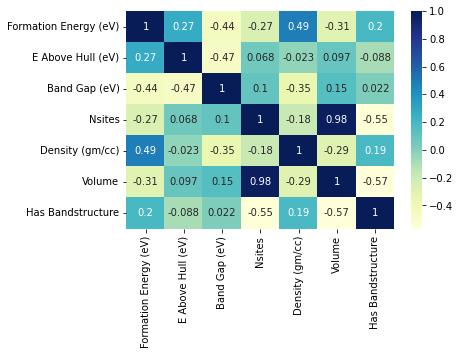

In [ ]:
# Heatmap of correlation matrix
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

### Feature Engineering

In [ ]:
data.columns

Index(['Materials Id', 'Formula', 'Spacegroup', 'Formation Energy (eV)',
       'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)',
       'Volume', 'Has Bandstructure', 'Crystal System'],
      dtype='object')

In [ ]:
data.dtypes

Materials Id              object
Formula                   object
Spacegroup                object
Formation Energy (eV)    float64
E Above Hull (eV)        float64
Band Gap (eV)            float64
Nsites                     int64
Density (gm/cc)          float64
Volume                   float64
Has Bandstructure           bool
Crystal System            object
dtype: object

In [ ]:
# No. of unique value in each feature
for i in data.columns:
  print(data[i].nunique())

339
114
44
251
108
307
49
300
339
2
3


In [ ]:
# Get numerical and categorical features
# perform Feature engineering on numerical features
numerical_feat = data.select_dtypes(include=['int64','float64']).columns
categorical_feat = data.select_dtypes(include=['object','bool']).columns

In [ ]:
numerical_feat

Index(['Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites',
       'Density (gm/cc)', 'Volume'],
      dtype='object')

In [ ]:
categorical_feat

Index(['Materials Id', 'Formula', 'Spacegroup', 'Has Bandstructure',
       'Crystal System'],
      dtype='object')

In [ ]:
data[categorical_feat].describe()

,Materials Id,Formula,Spacegroup,Has Bandstructure,Crystal System
count,339,339,339,339,339
unique,339,114,44,2,3
top,mp-849394,LiFeSiO4,P1,True,monoclinic
freq,1,42,72,274,139


In [ ]:
# Drop Materials Id column as it is not an important feature because it is categorical has all unique values
data = data.drop(['Materials Id'], axis=1)

In [ ]:
data.head()

,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


##### One hot encoding on 'Has Bandstructure' column
##### This feature column has only 2 unique values

In [ ]:
data['Has Bandstructure'].value_counts()

True     274
False     65
Name: Has Bandstructure, dtype: int64

In [ ]:
# One hot encoding
data['Has Bandstructure'] = data['Has Bandstructure'].map({True:1, False:0})
# can also be done by get_dummies

##### Label encoding and Ordinal number encoding for 'Spacegroup' column
##### label encoding: Encode target labels with value between 0 and n_classes-1.
##### ordinal encoding: Encode categorical features as an integer array.
##### both have the same functionality. A bit difference is the idea behind. OrdinalEncoder is for converting features, while LabelEncoder is for converting target variable.

In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Spacegroup']= label_encoder.fit_transform(data['Spacegroup'])

data['Spacegroup'].unique()

array([31, 21,  6,  1,  0, 20,  2, 19, 18, 17, 22, 26, 34, 38, 40,  4, 11,
       29,  5, 28,  8,  9, 33, 43, 30, 37, 23, 25, 35, 42, 12, 15, 24,  3,
       39, 32, 27, 41, 10, 13, 36, 14,  7, 16])

In [ ]:
data['Spacegroup'].nunique()

44

In [ ]:
data['Spacegroup'].value_counts()

16    72
21    32
31    27
20    23
6     16
1     15
0     12
40    12
34     8
25     8
43     8
2      6
4      6
11     6
29     6
5      6
28     6
8      6
32     6
23     6
27     5
30     4
38     4
3      3
26     3
33     3
9      3
19     3
15     2
10     2
17     2
37     2
42     2
35     2
22     2
39     2
24     1
18     1
12     1
41     1
13     1
36     1
14     1
7      1
Name: Spacegroup, dtype: int64

In [ ]:
# Ordinal number encoding
data['Spacegroup (ordinal)'] = pd.factorize(data['Spacegroup'])[0]

# Can also order by most common to least common
data['Spacegroup'].rank(method="dense").astype(int)

0      32
1      22
2       7
3       2
4       2
       ..
334    17
335    17
336    17
337    17
338    17
Name: Spacegroup, Length: 339, dtype: int64

#### Label encoding for 'Crystal System' column

In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Crystal System']= label_encoder.fit_transform(data['Crystal System'])

data['Crystal System'].unique()

array([0, 1, 2])

In [ ]:
data.head()

,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Spacegroup (ordinal)
0,Li2MnSiO4,31,-2.699,0.006,3.462,16,2.993,178.513,1,0,0
1,Li2MnSiO4,21,-2.696,0.008,2.879,32,2.926,365.272,1,0,1
2,Li4MnSi2O7,6,-2.775,0.012,3.653,28,2.761,301.775,1,0,2
3,Li4Mn2Si3O10,1,-2.783,0.013,3.015,38,2.908,436.183,1,0,3
4,Li2Mn3Si3O10,1,-2.747,0.016,2.578,36,3.334,421.286,1,0,3


#### Onehotencoding with many categorical variables for ' Formula' column

In [ ]:
data['Formula'].nunique()

114

In [ ]:
data['Formula'].value_counts().head(10)

LiFeSiO4         42
LiCoSiO4         29
Li2FeSiO4        15
Li2CoSiO4        14
Li2MnSiO4        12
LiMnSiO4         12
Li3Co2(SiO4)2    10
Li3Fe2(SiO4)2    10
LiFe(SiO3)2      10
Li2Mn(SiO3)2      7
Name: Formula, dtype: int64

In [ ]:
#Onehotencoding with many categories in a feature
lst_10=data.Formula.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [ ]:
lst_10

['LiFeSiO4',
 'LiCoSiO4',
 'Li2FeSiO4',
 'Li2CoSiO4',
 'Li2MnSiO4',
 'LiMnSiO4',
 'Li3Co2(SiO4)2',
 'Li3Fe2(SiO4)2',
 'LiFe(SiO3)2',
 'Li2Mn(SiO3)2']

In [ ]:
for categories in lst_10:
    data[categories]=np.where(data['Formula']==categories,1,0)

In [ ]:
lst_10.append('Formula')

In [ ]:
data[lst_10]

,LiFeSiO4,LiCoSiO4,Li2FeSiO4,Li2CoSiO4,Li2MnSiO4,LiMnSiO4,Li3Co2(SiO4)2,Li3Fe2(SiO4)2,LiFe(SiO3)2,Li2Mn(SiO3)2,Formula
0,0,0,0,0,1,0,0,0,0,0,Li2MnSiO4
1,0,0,0,0,1,0,0,0,0,0,Li2MnSiO4
2,0,0,0,0,0,0,0,0,0,0,Li4MnSi2O7
3,0,0,0,0,0,0,0,0,0,0,Li4Mn2Si3O10
4,0,0,0,0,0,0,0,0,0,0,Li2Mn3Si3O10
...,...,...,...,...,...,...,...,...,...,...,...
334,0,0,0,0,0,0,0,0,0,0,Li6Co(SiO4)2
335,0,0,0,0,0,0,0,0,0,0,LiCo3(SiO4)2
336,0,0,0,0,0,0,0,0,0,0,Li5Co4(Si3O10)2
337,0,1,0,0,0,0,0,0,0,0,LiCoSiO4


In [ ]:
data

,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,...,LiFeSiO4,LiCoSiO4,Li2FeSiO4,Li2CoSiO4,Li2MnSiO4,LiMnSiO4,Li3Co2(SiO4)2,Li3Fe2(SiO4)2,LiFe(SiO3)2,Li2Mn(SiO3)2
0,Li2MnSiO4,31,-2.699,0.006,3.462,16,2.993,178.513,1,0,...,0,0,0,0,1,0,0,0,0,0
1,Li2MnSiO4,21,-2.696,0.008,2.879,32,2.926,365.272,1,0,...,0,0,0,0,1,0,0,0,0,0
2,Li4MnSi2O7,6,-2.775,0.012,3.653,28,2.761,301.775,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Li4Mn2Si3O10,1,-2.783,0.013,3.015,38,2.908,436.183,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Li2Mn3Si3O10,1,-2.747,0.016,2.578,36,3.334,421.286,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,Li6Co(SiO4)2,16,-2.545,0.071,2.685,17,2.753,171.772,1,2,...,0,0,0,0,0,0,0,0,0,0
335,LiCo3(SiO4)2,16,-2.250,0.076,0.005,42,3.318,552.402,1,2,...,0,0,0,0,0,0,0,0,0,0
336,Li5Co4(Si3O10)2,16,-2.529,0.082,0.176,35,2.940,428.648,1,2,...,0,0,0,0,0,0,0,0,0,0
337,LiCoSiO4,16,-2.348,0.087,1.333,14,2.451,214.044,1,2,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
data = data.drop('Formula', axis=1)

In [ ]:
data.head()

,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Spacegroup (ordinal),LiFeSiO4,LiCoSiO4,Li2FeSiO4,Li2CoSiO4,Li2MnSiO4,LiMnSiO4,Li3Co2(SiO4)2,Li3Fe2(SiO4)2,LiFe(SiO3)2,Li2Mn(SiO3)2
0,31,-2.699,0.006,3.462,16,2.993,178.513,1,0,0,0,0,0,0,1,0,0,0,0,0
1,21,-2.696,0.008,2.879,32,2.926,365.272,1,0,1,0,0,0,0,1,0,0,0,0,0
2,6,-2.775,0.012,3.653,28,2.761,301.775,1,0,2,0,0,0,0,0,0,0,0,0,0
3,1,-2.783,0.013,3.015,38,2.908,436.183,1,0,3,0,0,0,0,0,0,0,0,0,0
4,1,-2.747,0.016,2.578,36,3.334,421.286,1,0,3,0,0,0,0,0,0,0,0,0,0


#### Got all numerical variables


### Models

In [ ]:
#Importing required packages and libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import io

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc,classification_report,roc_auc_score,plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from urllib.request import urlopen

#### Train test split

In [ ]:
data.head()

,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Spacegroup (ordinal),LiFeSiO4,LiCoSiO4,Li2FeSiO4,Li2CoSiO4,Li2MnSiO4,LiMnSiO4,Li3Co2(SiO4)2,Li3Fe2(SiO4)2,LiFe(SiO3)2,Li2Mn(SiO3)2
0,31,-2.699,0.006,3.462,16,2.993,178.513,1,0,0,0,0,0,0,1,0,0,0,0,0
1,21,-2.696,0.008,2.879,32,2.926,365.272,1,0,1,0,0,0,0,1,0,0,0,0,0
2,6,-2.775,0.012,3.653,28,2.761,301.775,1,0,2,0,0,0,0,0,0,0,0,0,0
3,1,-2.783,0.013,3.015,38,2.908,436.183,1,0,3,0,0,0,0,0,0,0,0,0,0
4,1,-2.747,0.016,2.578,36,3.334,421.286,1,0,3,0,0,0,0,0,0,0,0,0,0


In [ ]:
# #Standardization
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

In [ ]:
y = data[['Crystal System']] # target
X = data.drop('Crystal System', axis=1) #features
data_final = pd.concat([X, y], axis=1)

In [ ]:
data_final.head()

,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Spacegroup (ordinal),LiFeSiO4,LiCoSiO4,Li2FeSiO4,Li2CoSiO4,Li2MnSiO4,LiMnSiO4,Li3Co2(SiO4)2,Li3Fe2(SiO4)2,LiFe(SiO3)2,Li2Mn(SiO3)2,Crystal System
0,31,-2.699,0.006,3.462,16,2.993,178.513,1,0,0,0,0,0,1,0,0,0,0,0,0
1,21,-2.696,0.008,2.879,32,2.926,365.272,1,1,0,0,0,0,1,0,0,0,0,0,0
2,6,-2.775,0.012,3.653,28,2.761,301.775,1,2,0,0,0,0,0,0,0,0,0,0,0
3,1,-2.783,0.013,3.015,38,2.908,436.183,1,3,0,0,0,0,0,0,0,0,0,0,0
4,1,-2.747,0.016,2.578,36,3.334,421.286,1,3,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

###Logistic Regression

In [ ]:
#Fitting model on training data
lr = LogisticRegression()
model1 = lr.fit(X_train,y_train)
model1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#Storing model predictions on testing data
y_pred=lr.predict(X_test)

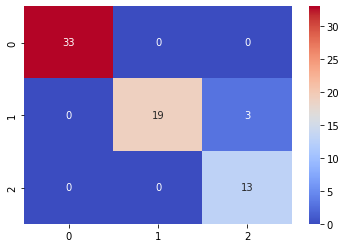

In [ ]:
#Using seaborn for ploting heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,cmap ='coolwarm' )
plt.show()

In [ ]:
#Print various scores of model 1 i.e.logistic regression
accuracy_1 = accuracy_score(y_test,y_pred)
print("Accuracy of logistic regression model is :",accuracy_1)
print("Precision of logistic regression model is :",metrics.precision_score(y_test, y_pred, average='micro'))
print("Recall of logistic regression model is :",metrics.recall_score(y_test, y_pred, average='micro'))

Accuracy of logistic regression model is : 0.9558823529411765
Precision of logistic regression model is : 0.9558823529411765
Recall of logistic regression model is : 0.9558823529411765


#### Lasso and Ridge regression (r^2 score and MSE)

In [ ]:
mean_squared_error(y_test,model1.predict(X_test))

0.04411764705882353

In [ ]:
r2 = r2_score(y_test,model1.predict(X_test))
print(r2)

0.9252199413489736


In [ ]:
#Lasso regularization
a = [0.001, 0.005, 0.01, 0.05, 0.1,0.5]
for i in range(len(a)):
  lasso_reg = linear_model.Lasso(alpha = a[i] )
  lasso_reg.fit(X_train,y_train)
  r2_l = r2_score(y_test,lasso_reg.predict(X_test))
  print("For alpha = " + str(a[i]) + " : MSE is " + str(mean_squared_error(y_test,lasso_reg.predict(X_test))) + "and r^2 score is : " + str(r2_l))


For alpha = 0.001 : MSE is 0.06767551382240884and r^2 score is : 0.8852890117614302
For alpha = 0.005 : MSE is 0.06815840975079497and r^2 score is : 0.8844704960822302
For alpha = 0.01 : MSE is 0.0686962212700239and r^2 score is : 0.8835588976713378
For alpha = 0.05 : MSE is 0.06874593879130389and r^2 score is : 0.8834746257437722
For alpha = 0.1 : MSE is 0.06903943985091732and r^2 score is : 0.8829771371441929
For alpha = 0.5 : MSE is 0.07003776157246654and r^2 score is : 0.8812849671880185


In [ ]:
#Ridge regularization
for i in range(len(a)):
  r_reg = Ridge(alpha = a[i] )
  r_reg.fit(X_train,y_train)
  r2_l = r2_score(y_test,r_reg.predict(X_test))
  print("For alpha = " + str(a[i]) + " : MSE is " + str(mean_squared_error(y_test,r_reg.predict(X_test))) + "and r^2 score is : " + str(r2_l))

For alpha = 0.001 : MSE is 0.06732565100477352and r^2 score is : 0.8858820343672753
For alpha = 0.005 : MSE is 0.06727197895569804and r^2 score is : 0.8859730092774385
For alpha = 0.01 : MSE is 0.06721461553500238and r^2 score is : 0.8860702411166235
For alpha = 0.05 : MSE is 0.06698667116480428and r^2 score is : 0.8864566101664021
For alpha = 0.1 : MSE is 0.06693811701324952and r^2 score is : 0.8865389101652251
For alpha = 0.5 : MSE is 0.06724116128768476and r^2 score is : 0.8860252456765929


####Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge_regressor = Ridge()

In [ ]:
parameters={'alpha': [1,2,3,4,5,10,20,30,40,50,60,70,80,90]}
ridgecv = GridSearchCV(ridge_regressor, parameters, scoring= 'neg_mean_squared_error', cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70,
                                   80, 90]},
             scoring='neg_mean_squared_error')

In [ ]:
print("best parameter is " , ridgecv.best_params_)
print("best score is ", ridgecv.best_score_)

best parameter is  {'alpha': 90}
best score is  -0.05903014406371846


In [ ]:
ridge_pred = ridgecv.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


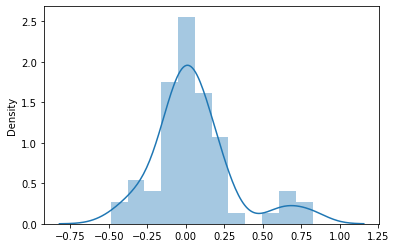

In [ ]:
sns.distplot(ridge_pred-y_test)

#### Lasso regression

In [ ]:
lasso = Lasso()

In [ ]:
parameters={'alpha': [1,2,3,4,5,10,20,30,40,50,60,70,80,90]}
lassocv = GridSearchCV(lasso, parameters, scoring= 'neg_mean_squared_error', cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70,
                                   80, 90]},
             scoring='neg_mean_squared_error')

In [ ]:
 lasso_pred = lassocv.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


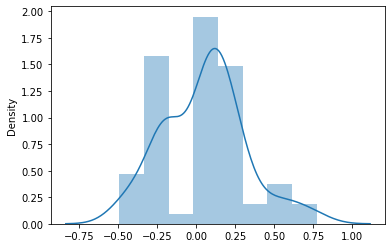

In [ ]:
lasso_pred = lasso_pred.reshape(68,1)
sns.distplot(lasso_pred-y_test)

In [ ]:
print("best parameter is " , lassocv.best_params_)
print("best score is ", lassocv.best_score_)

best parameter is  {'alpha': 1}
best score is  -0.06451504384578542


### Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
# prediction=rf_classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
# from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# print(confusion_matrix(y_test,prediction))
# print(accuracy_score(y_test,prediction))
# print(classification_report(y_test,prediction))

[[33  0  0]
 [ 0 22  0]
 [ 0  0 13]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=200,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=100, verbose=2)

In [ ]:
rf_randomcv.best_params_

{'n_estimators': 1366,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 560,
 'criterion': 'entropy'}

In [ ]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=100, verbose=2)

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[33  0  0]
 [ 0 22  0]
 [ 0  0 13]]
Accuracy Score 1.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



##Finding best model

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {'n_estimators': [100,1500,10]}
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    # 'naive_bayes_multinomial': {
    #     'model': MultinomialNB(),
    #     'params': {}
    # },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],

        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.988147,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.997015,{'n_estimators': 100}
2,logistic_regression,0.970457,{'C': 1}
3,naive_bayes_gaussian,0.858428,{}
4,decision_tree,0.997015,{'criterion': 'gini'}


In [ ]:
model = MultinomialNB()
model.fit(X_train,np.ravel(y_train))
y_predict = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_predict)
print(accuracy)

0.8088235294117647
